In [1]:
import pandas as pd

import os

In [2]:

full_list = [f for f in os.listdir('results') if f.endswith('confusionmat.csv')]

In [3]:

df = pd.concat( (pd.read_csv(os.path.join('results', f), sep= ',', header=None) for f in full_list), ignore_index=True, axis=0)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,18,2,0,4,0,24,0,0,2,0,18,4,3,0,8,13
1,19,5,0,0,6,18,0,0,6,2,9,7,9,4,4,7
2,16,1,3,4,3,16,3,2,4,1,2,17,2,0,3,19
3,16,0,0,8,22,0,1,1,3,0,4,17,2,0,2,20
4,21,0,0,3,8,15,1,0,2,1,14,7,3,0,11,10
5,19,1,1,3,2,20,1,1,1,5,11,7,6,0,10,8
6,21,1,0,2,12,12,0,0,5,1,9,9,8,0,3,13
7,16,4,1,3,3,21,0,0,2,1,11,10,1,3,5,15
8,12,1,0,11,21,3,0,0,1,2,13,8,3,0,7,14
9,20,1,0,3,21,3,0,0,4,2,0,18,5,0,1,18


In [4]:
mean_vals = df.mean(axis=0).values

In [5]:
mean_vals= mean_vals.reshape(4,4
                 )

print(mean_vals)

[[18.          1.94117647  0.64705882  3.41176471]
 [ 7.70588235 14.47058824  1.47058824  0.35294118]
 [ 3.82352941  1.29411765  9.47058824  9.41176471]
 [ 4.11764706  0.52941176  5.29411765 14.05882353]]


In [6]:
#from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
#%matplotlib inline

df_cm = pd.DataFrame(mean_vals, columns=['Q1','Q2','Q3','Q4'], index =['Q1','Q2','Q3','Q4'])
df_cm.index.name = 'project_label'
df_cm.columns.name = 'participant_label'

df_cm

participant_label,Q1,Q2,Q3,Q4
project_label,,,,
Q1,18.000000,1.941176,0.647059,3.411765
Q2,7.705882,14.470588,1.470588,0.352941
Q3,3.823529,1.294118,9.470588,9.411765
Q4,4.117647,0.529412,5.294118,14.058824


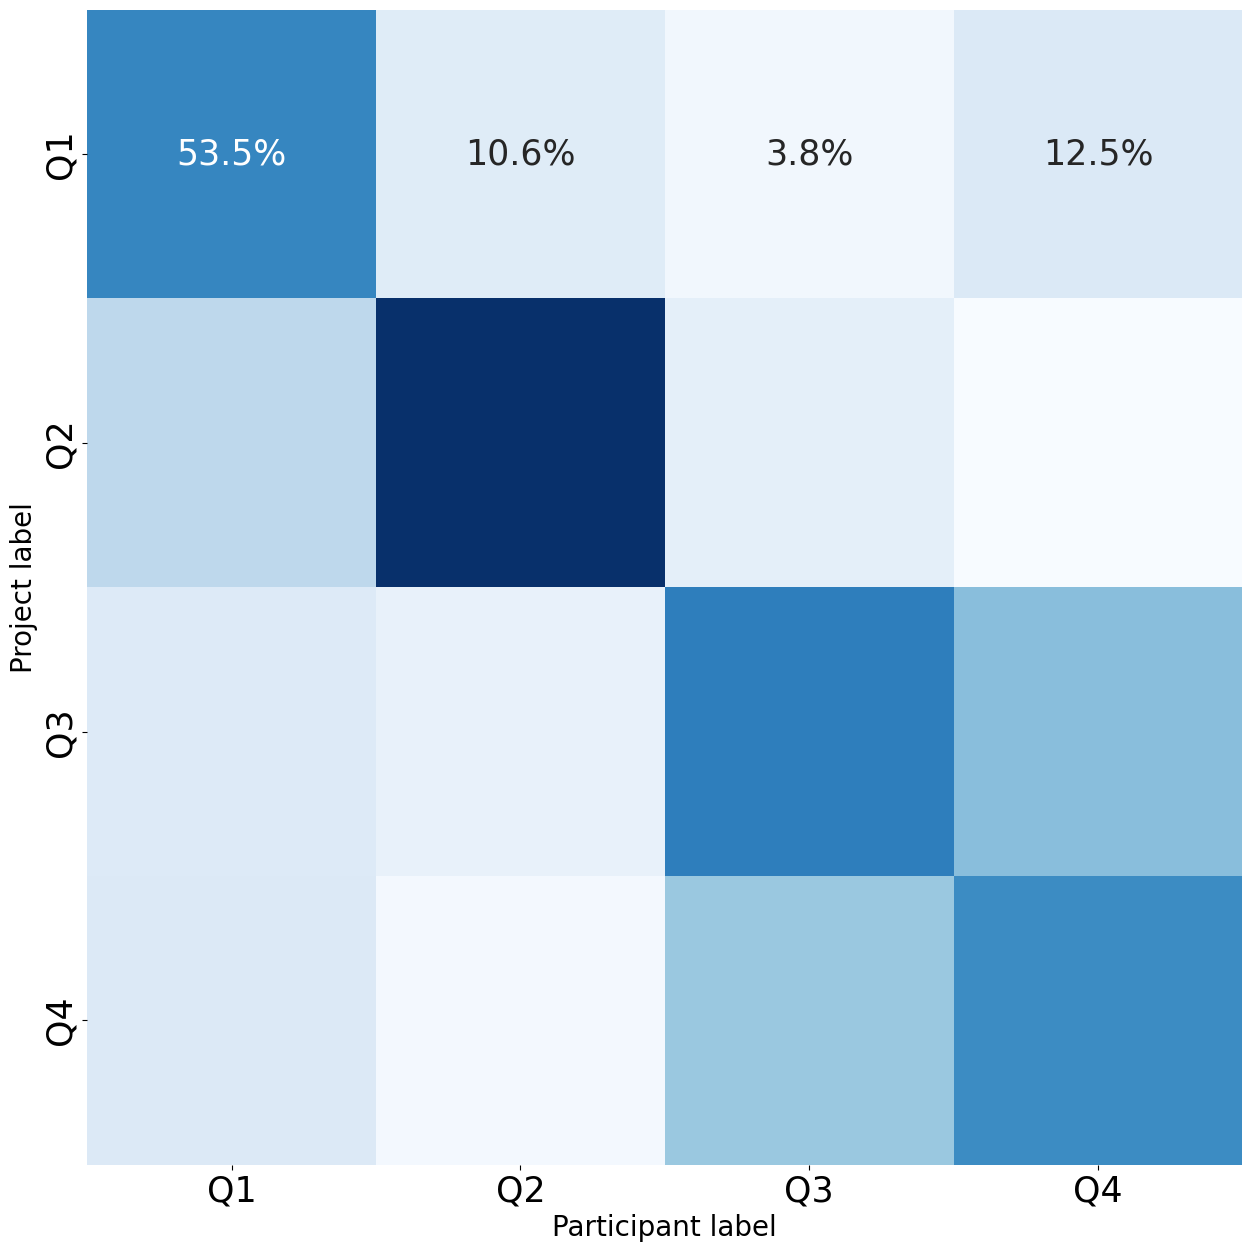

In [7]:
f, ax = plt.subplots(figsize=(15, 15))
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm/np.sum(df_cm), cbar=False, annot=True, cmap='Blues', square=True, fmt='.1%', annot_kws={'size': 25})

# increase tick size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.xlabel('Participant label', fontsize=20)
plt.ylabel('Project label', fontsize=20)
#plt.title('Mean')
plt.show()